# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_excel (r'cleaning_1.xlsx')
df.shape

(2285, 3)

In [3]:
df['intent'].replace(to_replace=[' drug+dose','drug+dose', 'drug+dpse'], value='drugs', inplace=True)
df['intent'].replace(to_replace=['contageos', 'contagious'] ,value ='contageous', inplace=True)
df['intent'].replace(to_replace=['info', 'Info'], value='information', inplace=True)

In [4]:
dff= df[(df['intent'] !='contageous')&(df['intent'] !='information')&(df['intent']!='options')&(df['intent'] !='reaction')&(df['intent'] !='test')]

In [5]:
dff.intent.unique()

array(['drugs', 'food+product', 'symptoms', 'vaccine'], dtype=object)

In [6]:
dff.shape

(1984, 3)

# finding the sequence length

In [7]:
dff['word_count'] = dff['question'].str.split().map(len)





#print(dff['word_count'].describe())

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
dff['word_count'].mode()

0    23
dtype: int64

In [9]:
dff.groupby('intent')['word_count'].mean().values.mean()

24.292047379477495

In [10]:
dff.groupby('intent')['word_count'].mean().values.mean()

24.292047379477495

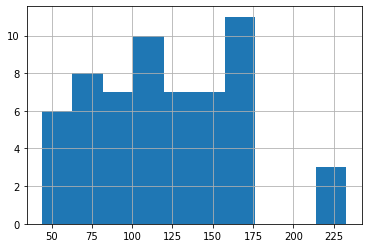

In [11]:
dff[dff['intent']=="vaccine"]["question"].str.len().hist()

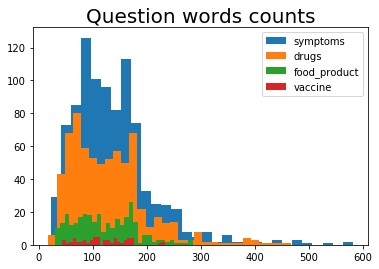

In [12]:
# to get the maximum sequence
vaccine =dff[dff['intent']=="vaccine"]["question"].str.len()
food_product =dff[dff['intent']=="food+product"]["question"].str.len()
symptoms =dff[dff['intent']=="symptoms"]["question"].str.len()
drugs=dff[dff['intent']=="drugs"]["question"].str.len()


plt.hist(symptoms, bins=30, label="symptoms")

plt.hist(drugs, bins=30, label="drugs")

plt.hist(food_product, bins=30, label="food_product")

plt.hist(vaccine, bins=30, label="vaccine")

plt.title("Question words counts",fontsize=20);
plt.legend()
plt.show()

In [13]:
dff["word_count"]

0       29
4       41
5       21
6       32
7       17
        ..
2278    16
2279    14
2280    14
2282    32
2283    40
Name: word_count, Length: 1984, dtype: int64

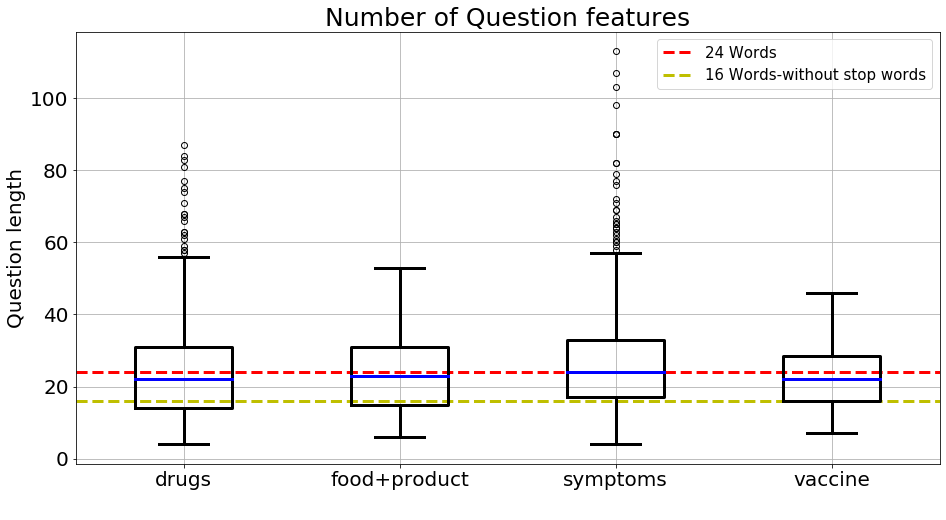

In [174]:
#x=dff.groupby('intent')['word_count']
#plt.figure(figsize=(15,8))
boxprops = dict(linestyle='-', linewidth=3, color='r')
#medianprops = dict(linestyle='-', linewidth=4, color='r')

medianprops = dict(linestyle='-', linewidth=3)

boxplot = dff.boxplot(column=['word_count'], by=['intent'],figsize=(15,8)
                      ,color=dict(boxes='Black', whiskers='Black', medians='blue', caps='black')
                      ,boxprops=boxprops 
                      ,medianprops=medianprops
                     ,capprops=dict(linestyle='-', linewidth=3,color='r')
                     ,whiskerprops=dict(linestyle='-', linewidth=3, color='r'));


reference = [24]
left, right = plt.xlim()


plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='dashed',linewidth=3 ,label="24 Words");

plt.suptitle("")
boxplot.set_title(" Number of Question features ",fontsize=25);
plt.ylabel("Question length",fontsize=20);
#plt.xlabel("intent",fontsize=20);
plt.xlabel(" ",fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);


plt.hlines(16, xmin=left, xmax=right, color='y', linestyles='dashed',linewidth=3 ,label="16 Words-without stop words");


labels = ["24 Words"]
handles, _ = boxplot.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[2:], labels = labels,fontsize=15)


In [175]:
#fig = boxplot.get_figure()
#fig.savefig("D:\output.png")

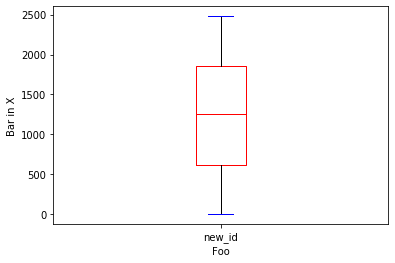

In [16]:

ax = df.plot(kind='box',
             color=dict(boxes='r', whiskers='Black', medians='r', caps='b'),
          
             showfliers=False)
ax.set_xlabel('Foo')
ax.set_ylabel('Bar in X')
plt.show()

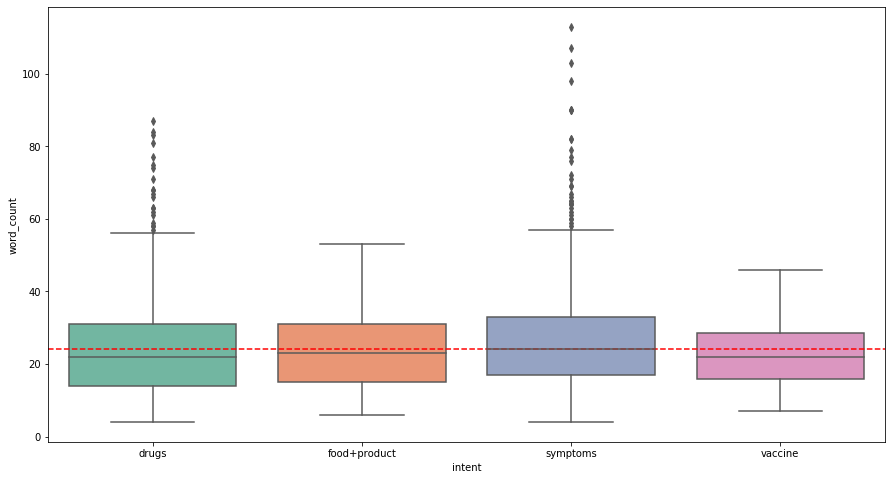

In [17]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="word_count", x="intent", data=dff,palette="Set2")

reference = [24]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='dashed')

# removing stop words

In [18]:
# ==== Helper Methods =====
import re
import numpy as np
from nltk import ngrams
import matplotlib.pyplot as plt

# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text

In [19]:
df['question'] =  df['question'].apply(lambda x: clean_str(x))

In [20]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')
#print(stopwords_list)
#---------------------------------------------------------------------------
egyp=[]
# Using readlines()

file1 = open("stop_words.txt", "r" ,encoding = "utf-8")
Lines = file1.readlines()
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    egyp.append(line.strip())
    
    #print( line.strip())
#print(egyp)
#----------------------------------------------------------------------------
# combine two lists
egyp=egyp+stopwords_list

In [33]:
dff['question']=dff['question'].apply(lambda words: ' '.join(re.sub('^(ال)',"",word)
                                                           for word in words.split() if ((word not in egyp))))

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
dff['word_count_nostop'] = dff['question'].str.split().map(len)

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


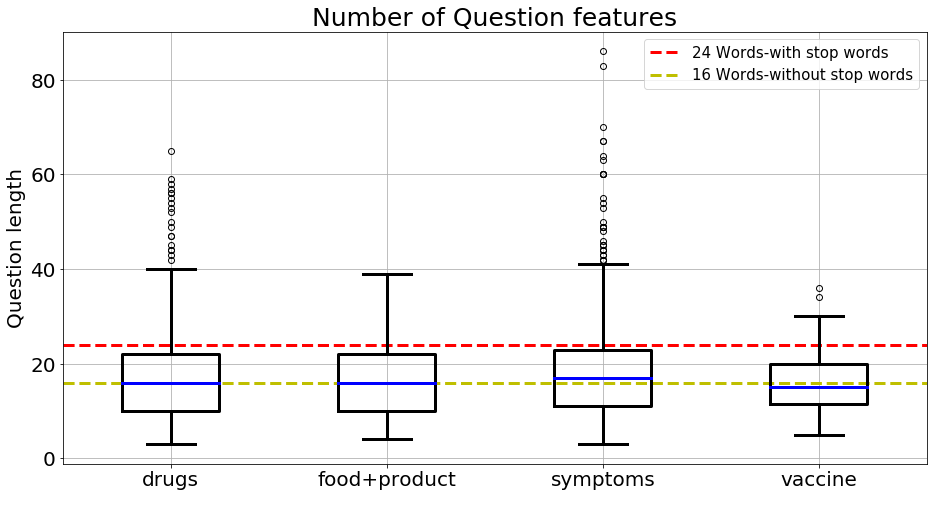

In [176]:
#x=dff.groupby('intent')['word_count']
#plt.figure(figsize=(15,8))
boxprops = dict(linestyle='-', linewidth=3, color='r')
#medianprops = dict(linestyle='-', linewidth=4, color='r')

medianprops = dict(linestyle='-', linewidth=3)

boxplot = dff.boxplot(column=['word_count_nostop'], by=['intent'],figsize=(15,8)
                      ,color=dict(boxes='Black', whiskers='Black', medians='blue', caps='black')
                      ,boxprops=boxprops 
                      ,medianprops=medianprops
                     ,capprops=dict(linestyle='-', linewidth=3,color='r')
                     ,whiskerprops=dict(linestyle='-', linewidth=3, color='r'));



reference = [24]
left, right = plt.xlim()


plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='dashed',linewidth=3 ,label="24 Words-with stop words");

plt.hlines(16, xmin=left, xmax=right, color='y', linestyles='dashed',linewidth=3 ,label="16 Words-without stop words");

plt.suptitle("")
boxplot.set_title(" Number of Question features ",fontsize=25);
plt.ylabel("Question length",fontsize=20);
#plt.xlabel("intent",fontsize=20);
plt.xlabel(" ",fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);





labels = ["24 Words-with stop words","16 Words-without stop words"]
handles, _ = boxplot.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[2:], labels = labels,fontsize=15)

In [177]:
fig = boxplot.get_figure()
fig.savefig("D:\outputtt.png")

In [160]:
dff

,question,new_id,intent,word_count,word_count_nostop
0,لديها حساسيه صدر تاتيها كحه جافه اطباء كحه نبا...,1465,drugs,29,12
4,nطفلي سنة شهرين يعاني احتقان بالحلق يتناول مضا...,8,drugs,41,28
5,ابنتي 4 اعطاها دكتور دواء Teedex دواء مكتوب يع...,13,drugs,21,12
6,سنه ونصفالانيميا ١٠مع علم ١١ وبياخد حديد سبريا...,19,drugs,32,20
7,اريد استفسار منوم اطفال يسبب مضاعفات مشاكل صحي...,21,drugs,17,14
...,...,...,...,...,...
2278,يمكن للورم نجمي شعري خلايا درجة 1 بالدماغ nان ...,2421,drugs,16,14
2279,يمكنني اعطاء سنه حليب ابل وباي مني,2424,food+product,14,7
2280,يمكني اعطاء 6شهور منوم يومي حالات شديده,2426,drugs,14,7
2282,يوجد حل لطفلتي تعاني اسهال مزمن ولاده واخر شخص...,2432,drugs,32,24


In [161]:
x=dff.groupby(['intent'])['word_count','word_count_nostop']
x.head()

C:\Users\T.Mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,word_count,word_count_nostop
0,29,12
4,41,28
5,21,12
6,32,20
7,17,14
500,31,22
501,18,13
502,11,8
503,9,7
504,8,6


C:\Users\T.Mohamed\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:375: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


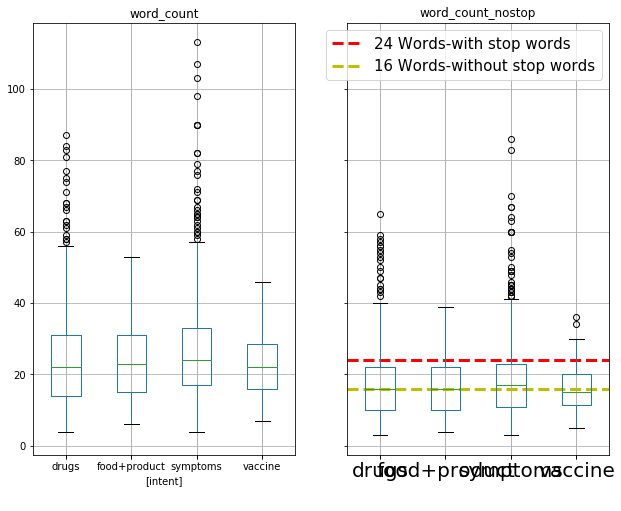

In [172]:
#dff
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
dx=dff.iloc[:,[2,3,4]]
dx.boxplot( by='intent', ax=ax);
reference = [24]
left, right = plt.xlim()


plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='dashed',linewidth=3 ,label="24 Words-with stop words");

plt.hlines(16, xmin=left, xmax=right, color='y', linestyles='dashed',linewidth=3 ,label="16 Words-without stop words");

plt.suptitle("")
boxplot.set_title(" Number of Question features ",fontsize=25);
plt.ylabel("Question length",fontsize=20);
#plt.xlabel("intent",fontsize=20);
plt.xlabel(" ",fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);





labels = ["24 Words-with stop words","16 Words-without stop words"]
handles, _ = boxplot.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[2:], labels = labels,fontsize=15)
